In [1]:
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.DataFrame() # создаем  пустой датафрейм
# считываем файлы из всех папок, лежащих в папке data, то есть все что ниже в директории
for path,dirs,files in os.walk('/home/jupyter-t-varenichenko-22/shared/homeworks/python_ds_miniprojects/4/data/'):
    if files != []:
        full_path = path + '/'+ files[0] # или = f'{path}/{files[0]}'
        df1 = pd.read_csv(full_path, sep=',')
        df1['name'] = path.split('/')[-1] # создали папку в дф из названия папок с именами, так весь путь = включая папку-фамилию
        df1['date'] = path.split('/')[-2] # создали папку в дф из названия папок с датами 
        df = pd.concat([df,df1], ignore_index = True) # объединяем все датафрейм, если поставить axis=0, объединение будет по вертикали, если =1 - по горизонтали
df = df.drop(columns = 'Unnamed: 0')
df

# можно по другому:
#for path,dirs,files in os.walk('/home/jupyter-t-varenichenko-22/shared/homeworks/python_ds_miniprojects/4/data/'):
#    for file in files:
#        full_path = f'{path}/{files[0]}' 
#        df1 = pd.read_csv(full_path, sep=',')
#        df1['name'] = path.split('/')[-1] # создали папку в дф из названия папок с именами
#        df1['date'] = path.split('/')[-2] # создали папку в дф из названия папок с датами 
#        df = pd.concat([df,df1], ignore_index = True)

In [22]:
df.quantity.sum()

480

In [35]:
df.groupby('name', as_index = False)\ 
                                    .agg({'quantity' : 'sum'}) \
                                    .sort_values('quantity', ascending = False) \
                                    .head(2) \
                                    .name \
                                    .tolist()

['Alexey_Smirnov', 'Petr_Smirnov']

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот 

In [57]:
top_10 = df.groupby('product_id', as_index = False) \
           .agg({'quantity' : 'sum'}) \
           .sort_values('quantity', ascending = False) \
           .head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


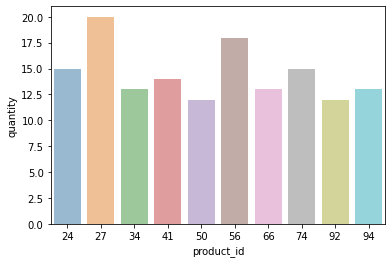

In [61]:
sns.barplot(x = 'product_id', y = 'quantity', data = top_10, alpha = 0.5)

Посмотрим на продажи по дням

In [73]:
by_date = df.groupby('date', as_index = False).agg({'quantity' : 'sum'}).sort_values('quantity', ascending = False).head(10)
by_date

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


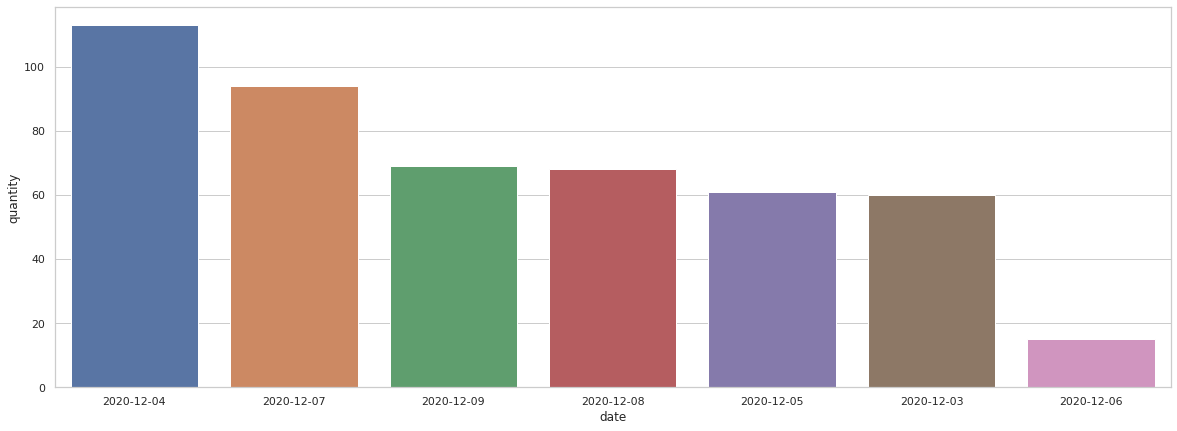

In [75]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
sns.barplot(x = 'date', y = 'quantity', data = by_date)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [87]:
df_ = df.drop_duplicates(subset = ['name','date','product_id'])
df_.groupby(['product_id','name'], as_index = False) \
    .agg({'date': 'count'}) \
    .rename(columns = {'date': 'again'}) \
    .query('again > 1')

или можно было без удаления дубликатов
df_.groupby(['product_id','name'], as_index = False) \
    .agg({'date': 'pd.Series.nuniqiue'}) \
    .query('again > 1')

,product_id,name,again
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2


In [ ]:
#извлечь из таблицы записи с ИНН, указанными в текстовом файле
#записать результат в файл selected_inn.csv
inn = pd.read_excel('/home/jupyter-t-varenichenko-22/shared/homeworks/python_ds_miniprojects/4_inn/inn.xls')
inn.shape()

In [95]:
nec_inn = pd.read_csv('/home/jupyter-t-varenichenko-22/shared/homeworks/python_ds_miniprojects/4_inn/necessary_inn.txt', header=None)
nec_inn

,0
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615
...,...
110,664306216794
111,991951385204
112,129413497752
113,447901012904
